# **Capstone UAS Bengkel Koding (Data Science - DS01)**
Nama : Anggita Alya Salsabila <br>
NIM  : A11.2022.14401 <br>
Link Colab : https://colab.research.google.com/drive/1TchyjJU_-3nqpP_mcvTyCfd2eltM2CnV?usp=sharing

Link Github : https://github.com/Anggita2604/Capstone_UAS_Anggi.git

Link Deploy : https://ee2c-35-236-219-210.ngrok-free.app/

##**1. Exploratory Data Analysis (EDA)**

In [25]:
#import Library
import pandas as pd # Untuk melakukan manipulasi,analisis, dan visualisasi data
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Lybrary yang dibangun di atas Matplotlib
import numpy as np # untuk operasi numerik
import time

In [26]:
#Menghubungkan Gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Untuk membaca dataset yang ada di Gdrive
df = pd.read_csv('/content/drive/MyDrive/Bengkod/Project UAS/ObesityDataSet.csv')

In [28]:
# Menampilkan 10 dataset
print("Menampilkan beberapa baris pertama:")
df.head(10)

Menampilkan beberapa baris pertama:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,29,Male,1.62,53,Sometimes,yes,2,3,no,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,23,Female,1.5,55,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Motorbike,Normal_Weight
7,22,Male,1.64,53,Sometimes,no,2,3,no,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,24,Male,1.78,348.49777557852735,Frequently,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight
9,22,Male,1.72,68,no,yes,2,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight


In [29]:
# Menampilkan Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [30]:
# Menampilkan informasi dataset
print("Menampilkan Informasi dataset:")
df.info()

Menampilkan Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF              

In [31]:
#Statistik deskripsi dataset
print("Manampilkan Deskripsi dataset:")
df.describe(include='all')

Manampilkan Deskripsi dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


1. Tipe data belum sesuai: Semua kolom masih bertipe object, termasuk kolom yang seharusnya angka seperti Age, Height, dan Weight. Data perlu diubah ke bentuk numerik atau kategorikal sesuai isinya.

2. Ada data yang kosong (missing value): Beberapa kolom masih memiliki nilai kosong, ?, dll.

3. Nilai unik belum rapi: Contohnya, kolom Gender memiliki 3 nilai unik, padahal seharusnya hanya 2 (pria dan wanita).

In [32]:
# Nilai unik setiap kolom
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [33]:
# Cek Missing Values
print("Missing Values per Kolom:")
df.isnull().sum()

Missing Values per Kolom:


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


Berdasarkan hasil analisis, ditemukan bahwa beberapa kolom masih memiliki data yang kosong (missing values) dan nilai unique.

In [34]:
# Menampilkan Baris yang Mengandung Nilai Kosong
df[df.isnull().any(axis=1)]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
33,39,Male,1.79,NaN,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
64,21,Female,1.66,NaN,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
67,23,Male,1.65,95,Frequently,yes,2,NaN,no,no,2,yes,0,1,Always,Automobile,Obesity_Type_I
69,23,Male,1.8,60,Sometimes,no,NaN,3,no,no,3,yes,0,1,no,Public_Transportation,Normal_Weight
73,19,Male,1.85,65,Sometimes,no,NaN,3,no,no,3,yes,2,1,Sometimes,Bike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,25.895546,Female,1.626179,110.074019,Sometimes,yes,3,3,NaN,no,1.967707,yes,0.01437,0.434073,Sometimes,Public_Transportation,Obesity_Type_III
2048,18.634286,Female,1.669354,126.088301,Sometimes,yes,3,NaN,no,no,1.144539,yes,0.922014,0.899673,Sometimes,Public_Transportation,Obesity_Type_III
2067,23.647935,Female,1.681394,114.479459,Sometimes,yes,3,3,NaN,no,2.435978,yes,0.232742,0.692608,Sometimes,Public_Transportation,Obesity_Type_III
2080,NaN,Female,1.741925,133.017105,Sometimes,yes,3,3,no,no,2.474518,yes,1.560261,0.662489,Sometimes,Public_Transportation,Obesity_Type_III


Dari hasil diatas terdeteksi ada bebrapa baris yang mengandung nilai kosong dan itu terdeteksi sebagai NaN.

In [35]:
# Mengecek data duplikat
df.duplicated().sum()

np.int64(18)

In [36]:
# Menampilkan Jumlah dan Daftar Nilai Unik per Kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print("Daftar nilai unik:", df[col].unique())


Kolom: Age
Jumlah nilai unik: 1394
Daftar nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 3
Daftar nilai unik: ['Female' 'Male' '?' nan]

Kolom: Height
Jumlah nilai unik: 1562
Daftar nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1518
Daftar nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: CALC
Jumlah nilai unik: 5
Daftar nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: FAVC
Jumlah nilai unik: 3
Daftar nilai unik: ['no' 'yes' '?' nan]

Kolom: FCVC
Jumlah nilai unik: 808
Daftar nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448

In [37]:
# Mengganti '', ' ', '?' menjadi NaN
df.replace(['', ' ', '?'], np.nan, inplace=True)

In [38]:
# Menampilkan Jumlah dan Daftar Nilai Unik per Kolom setelah menggantinya jadi Nan
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print("Daftar nilai unik:", df[col].unique())


Kolom: Age
Jumlah nilai unik: 1393
Daftar nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 2
Daftar nilai unik: ['Female' 'Male' nan]

Kolom: Height
Jumlah nilai unik: 1561
Daftar nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1517
Daftar nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: CALC
Jumlah nilai unik: 4
Daftar nilai unik: ['no' 'Sometimes' 'Frequently' nan 'Always']

Kolom: FAVC
Jumlah nilai unik: 2
Daftar nilai unik: ['no' 'yes' nan]

Kolom: FCVC
Jumlah nilai unik: 807
Daftar nilai unik: ['2' '3' '1' nan '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2

Value '', ' ', '?' sudah diubah kebentuk NaN

In [39]:
# List semua kolom numeric yang mau dicek
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Age
Age
18           124
26            99
21            96
23            89
19            59
            ... 
31.426573      1
34.369686      1
33.690239      1
37.496175      1
18.701766      1
Name: count, Length: 1393, dtype: int64

Kolom: Height
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.699474     1
1.621048     1
1.560029     1
1.835678     1
1.701397     1
Name: count, Length: 1561, dtype: int64

Kolom: Weight
Weight
80           58
50           42
70           41
75           39
60           36
             ..
97.92035      1
88.431954     1
86.963628     1
84.315608     1
89.802492     1
Name: count, Length: 1517, dtype: int64

Kolom: FCVC
FCVC
3           647
2           592
1            33
2.442536      2
2.823179      2
           ... 
2.010684      1
2.300408      1
2.119643      1
2.901924      1
2.749629      1
Name: count, Length: 807, dtype: int64

Kolom: NCP
NCP
3           1183
1            196
4        

In [40]:
# Fitur kategorikal dan biner sesuai dengan nama kolom yang asli (sebelah kiri)
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
                    'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Mengubah tipe data untuk kolom-kolom kategori menjadi 'category'
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Cek tipe data kolom-kolom setelah perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2089 non-null   object  
 1   Gender                          2089 non-null   category
 2   Height                          2089 non-null   object  
 3   Weight                          2092 non-null   object  
 4   CALC                            2091 non-null   category
 5   FAVC                            2089 non-null   category
 6   FCVC                            2093 non-null   category
 7   NCP                             2089 non-null   category
 8   SCC                             2093 non-null   category
 9   SMOKE                           2098 non-null   category
 10  CH2O                            2096 non-null   category
 11  family_history_with_overweight  2088 non-null   category
 12  FAF                 

In [41]:
# Fitur integer
integer_cols = ['FCVC', 'TUE', 'NCP', 'CH2O', 'FAF']

for col in integer_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')  # Mengubah menjadi integer

# Fitur kontinu
continuous_cols = ['Age', 'Height', 'Weight']

# Age → round ke integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').round().astype('Int64')

# Height → 2 desimal
df['Height'] = pd.to_numeric(df['Height'], errors='coerce').round(2)

# Weight → 1 desimal
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce').round(1)

In [42]:
# Menampilkan Informasi umum dataset setelah type data nya diganti
df.info()

# Deskripsi statistik data numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2089 non-null   Int64   
 1   Gender                          2089 non-null   category
 2   Height                          2089 non-null   float64 
 3   Weight                          2092 non-null   float64 
 4   CALC                            2091 non-null   category
 5   FAVC                            2089 non-null   category
 6   FCVC                            2093 non-null   Int64   
 7   NCP                             2089 non-null   Int64   
 8   SCC                             2093 non-null   category
 9   SMOKE                           2098 non-null   category
 10  CH2O                            2096 non-null   Int64   
 11  family_history_with_overweight  2088 non-null   category
 12  FAF                 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.0,2089.000000,2092.000000,2093.0,2089.0,2096.0,2092.0,2096.0
mean,24.72044,1.706573,88.608174,2.449116,2.732408,2.036737,1.071224,0.686546
std,8.399528,0.117753,36.154784,0.685074,1.003207,0.800409,1.187047,0.775847
min,14.0,1.450000,39.000000,1.0,1.0,1.0,0.0,0.0
25%,20.0,1.630000,66.000000,2.0,3.0,2.0,0.0,0.0
50%,23.0,1.700000,83.000000,2.0,3.0,2.0,1.0,1.0
75%,26.0,1.770000,108.025000,3.0,3.0,2.0,2.0,1.0
max,106.0,2.850000,441.100000,9.0,12.0,9.0,12.0,8.0


In [43]:
# List semua kolom numeric yang akan dicek setelah dibulatkan
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 52
Age
21     235
23     214
26     208
18     207
19     169
22     160
20     148
24      95
25      81
17      69
31      60
30      51
27      41
33      35
38      34
29      31
34      29
32      25
37      24
39      24
28      20
41      20
35      19
16      19
40      19
36       6
42       6
44       6
55       5
45       3
43       3
46       2
51       2
88       1
52       1
61       1
56       1
94       1
15       1
14       1
89       1
97       1
99       1
103      1
105      1
48       1
47       1
106      1
91       1
92       1
96       1
101      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 61
Height
1.70    122
1.75    120
1.62     94
1.76     93
1.65     87
       ... 
2.70      1
1.95      1
1.94      1
2.63      1
2.85      1
Name: count, Length: 61, dtype: int64

Kolom: Weight
Jumlah nilai unik: 697
Weight
80.0     62
50.0     44
70.0     42
75.0     40
60.0     37
         ..
41.4      1
49.5      1
81.4     

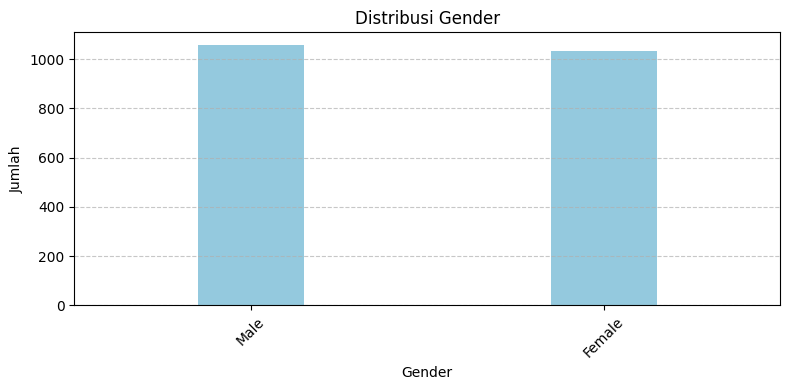

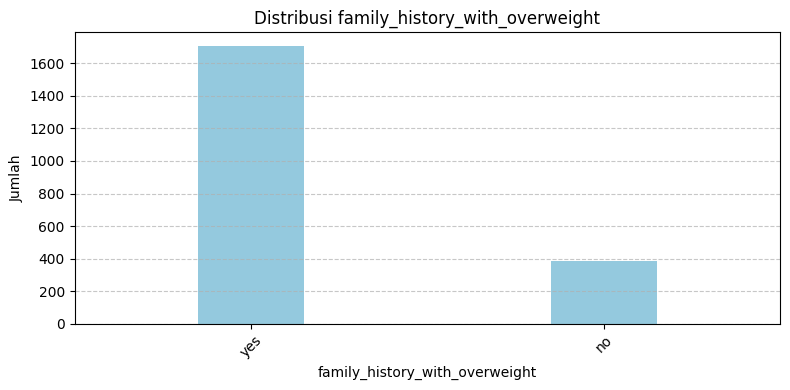

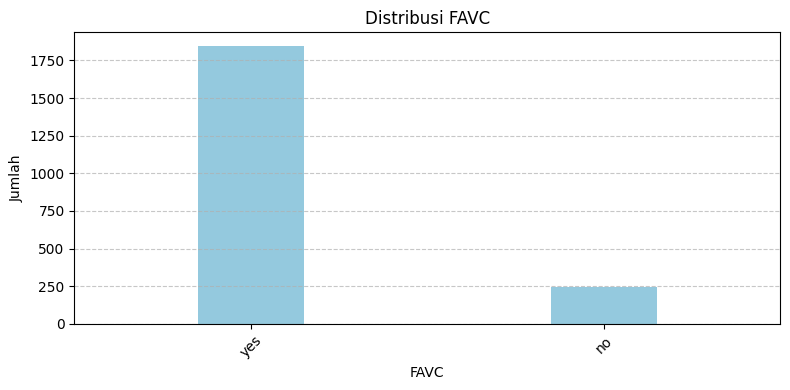

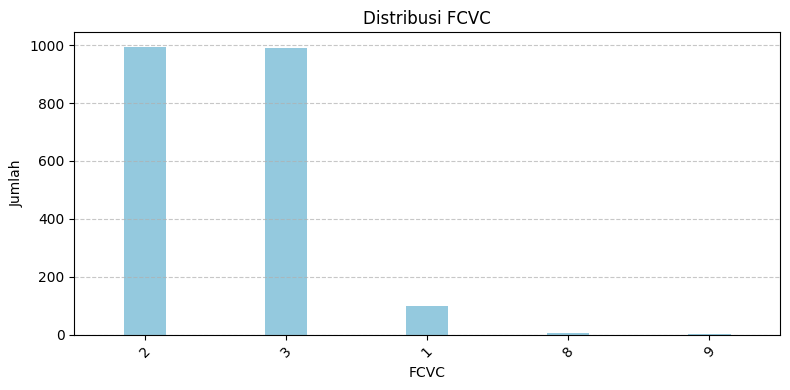

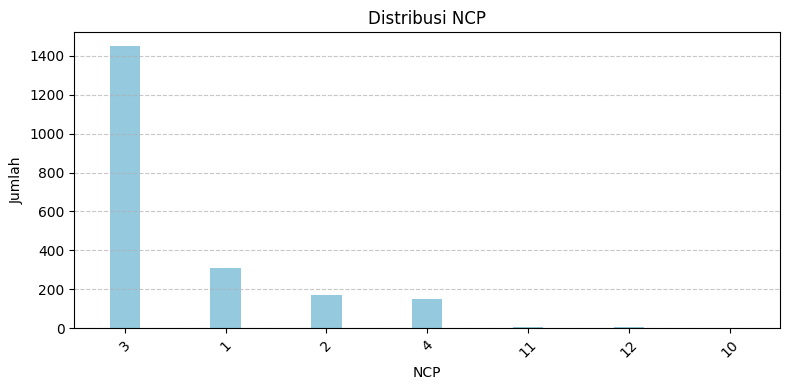

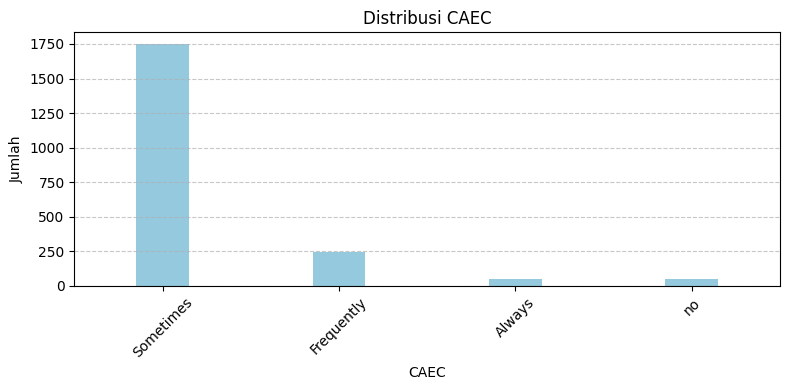

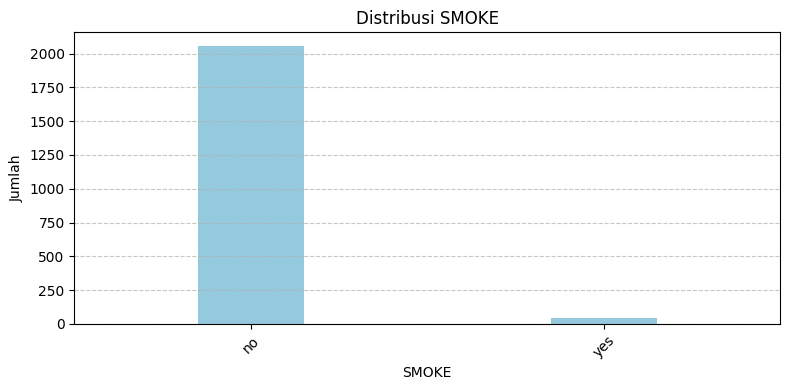

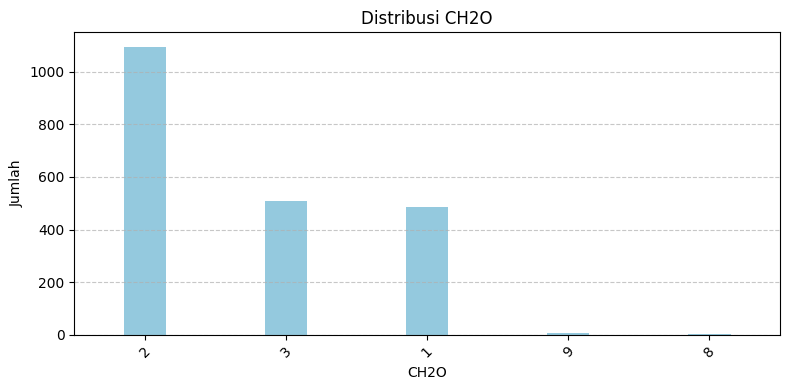

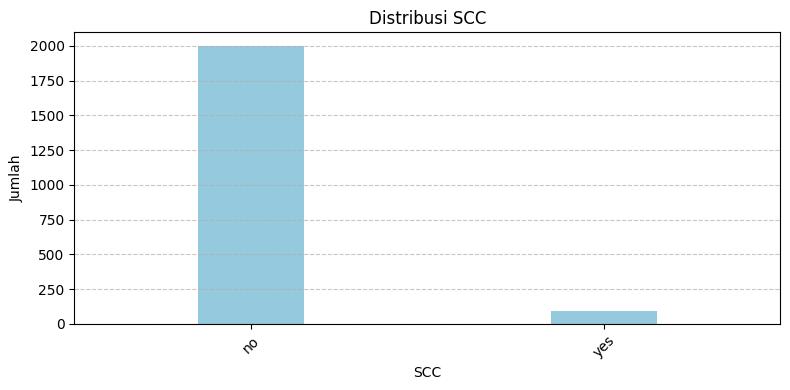

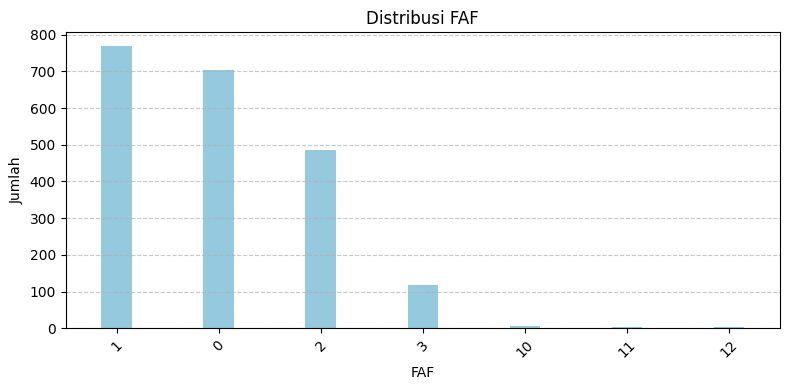

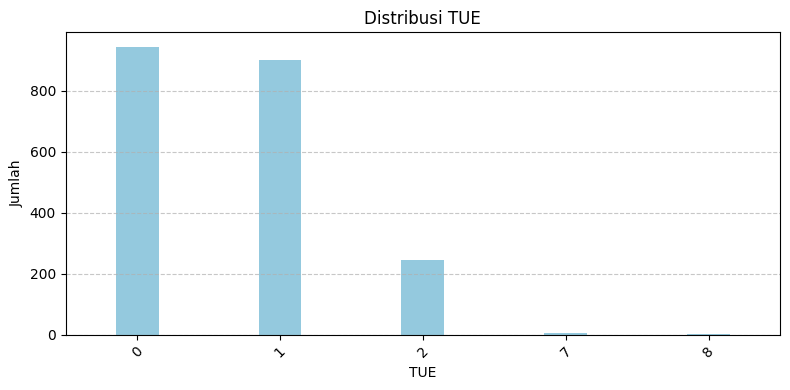

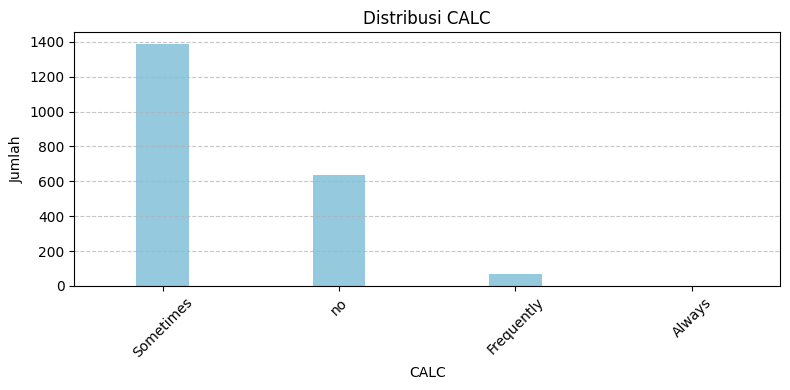

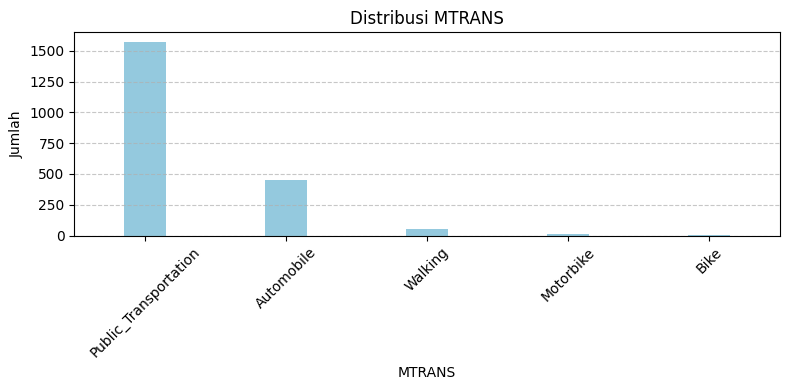

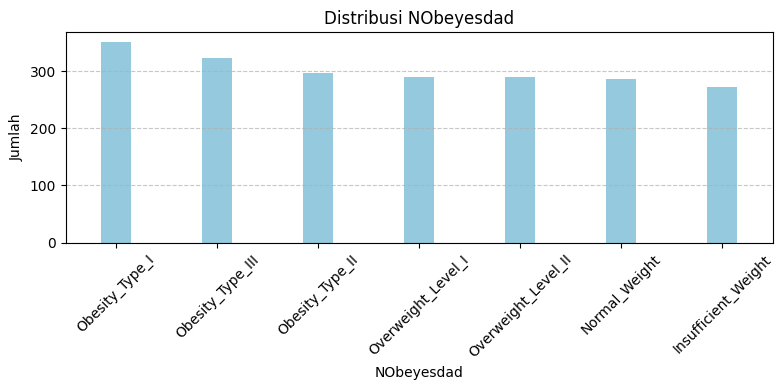

In [44]:
# Daftar fitur kategori
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
                    'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Plot bar untuk setiap fitur kategori
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue', width=0.3)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

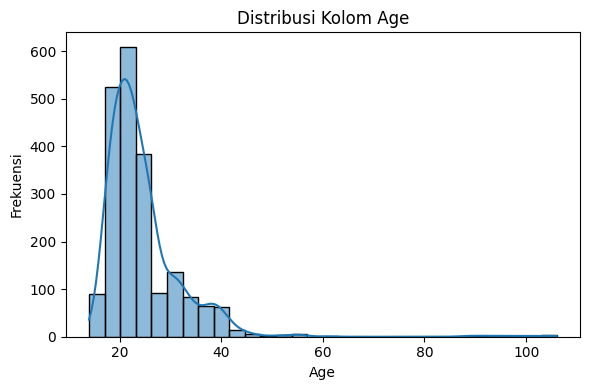

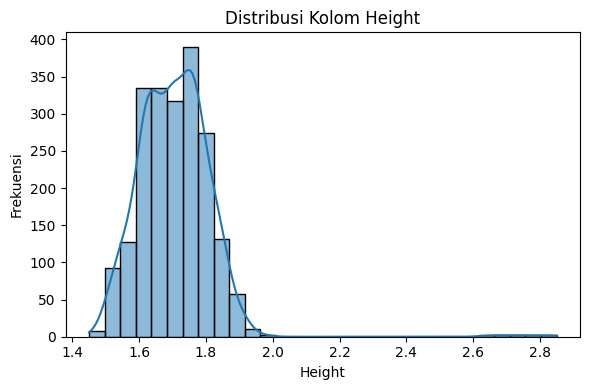

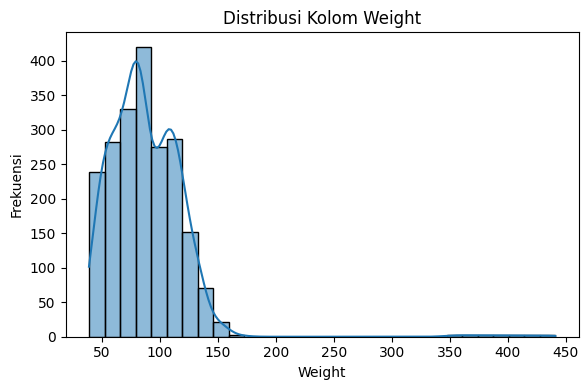

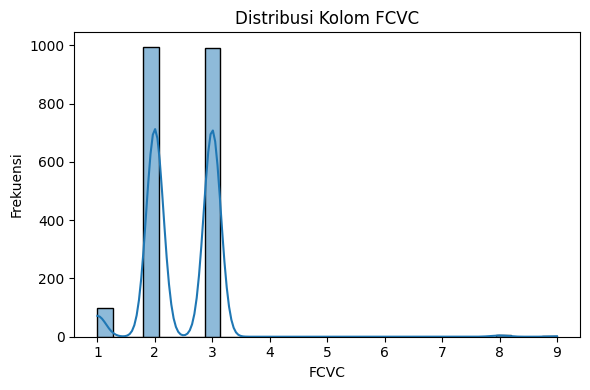

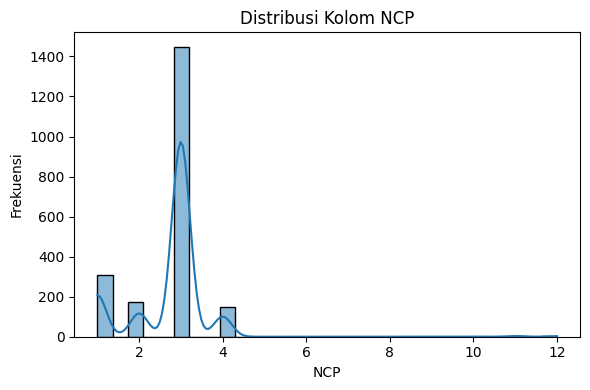

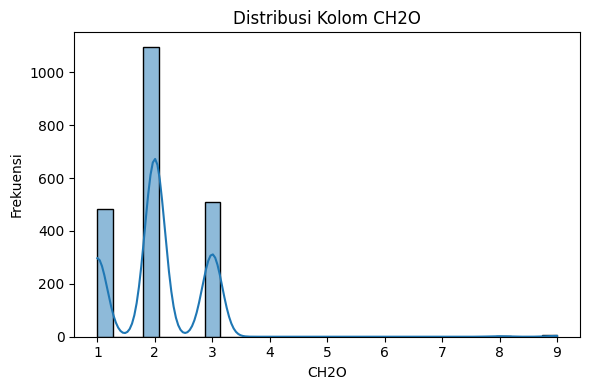

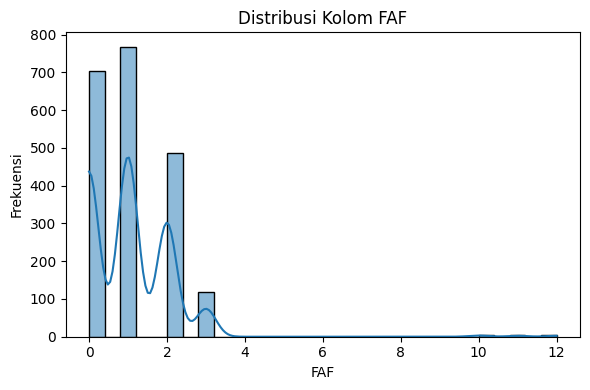

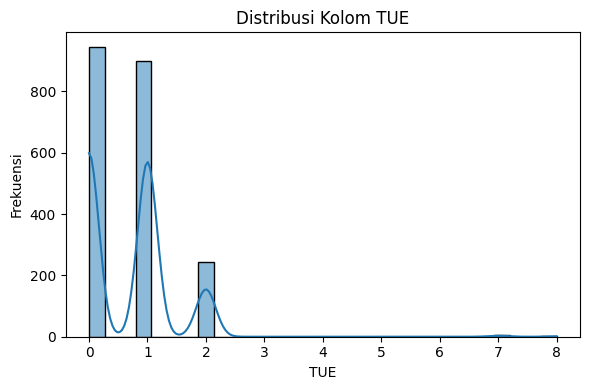

In [45]:
# Daftar kolom numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Histogram untuk tiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

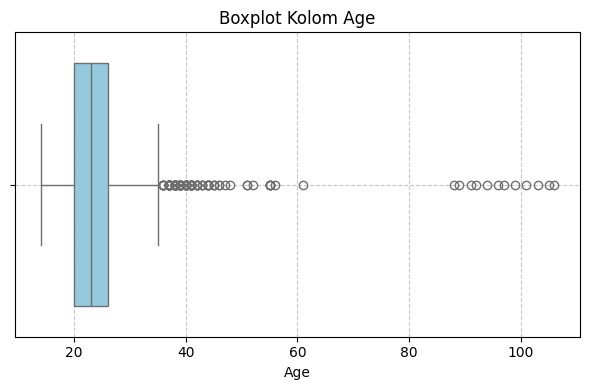

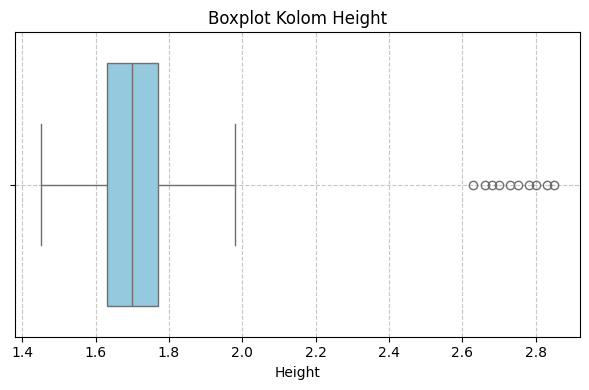

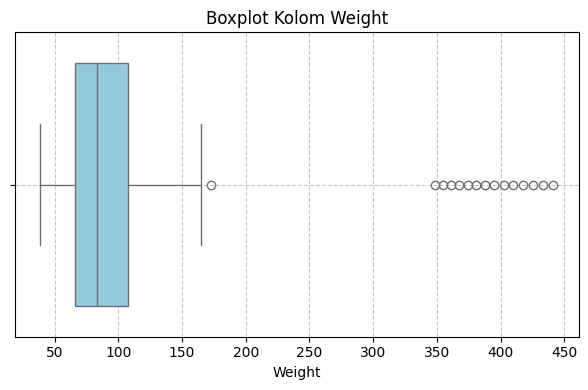

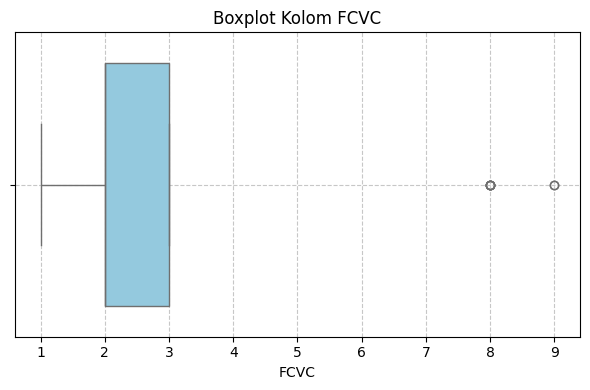

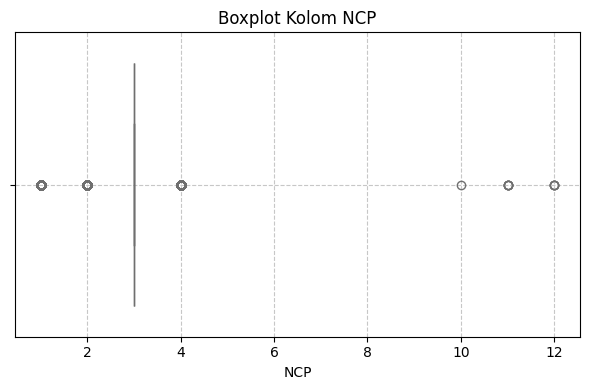

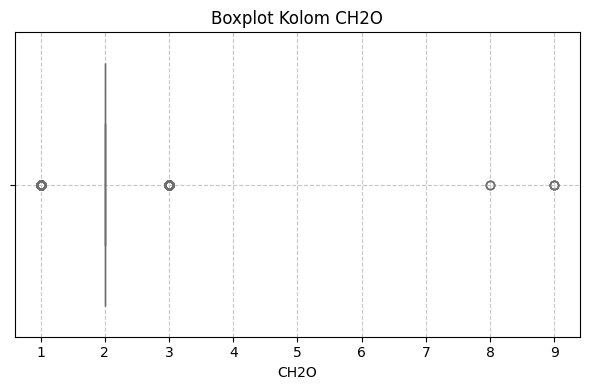

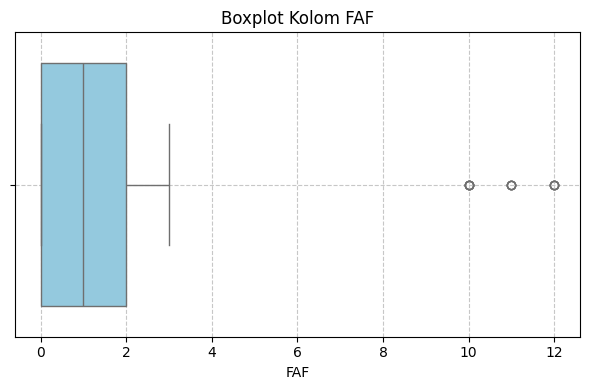

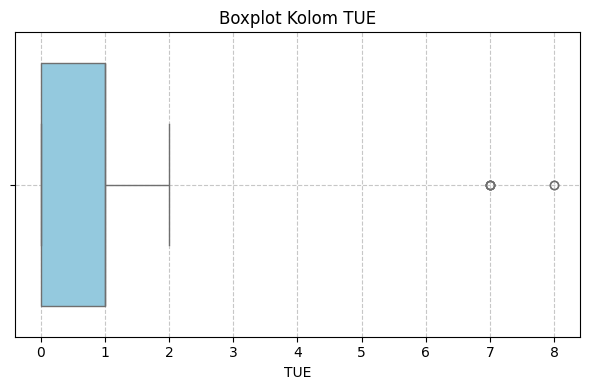

In [46]:
# Daftar kolom numerik (pastikan sudah didefinisikan sebelumnya)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Menampilkan boxplot untuk setiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # Ukuran figure
    sns.boxplot(x=df[col], color='skyblue')  # Warna bisa diganti sesuai selera
    plt.title(f'Boxplot Kolom {col}')  # Judul boxplot
    plt.xlabel(col)  # Label sumbu x
    plt.grid(True, linestyle='--', alpha=0.7)  # Tambahkan grid agar lebih rapi
    plt.tight_layout()  # Menghindari pemotongan label
    plt.show()

Distribusi Kelas Target (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Persentase Tiap Kelas:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


<ipython-input-47-785591690>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')


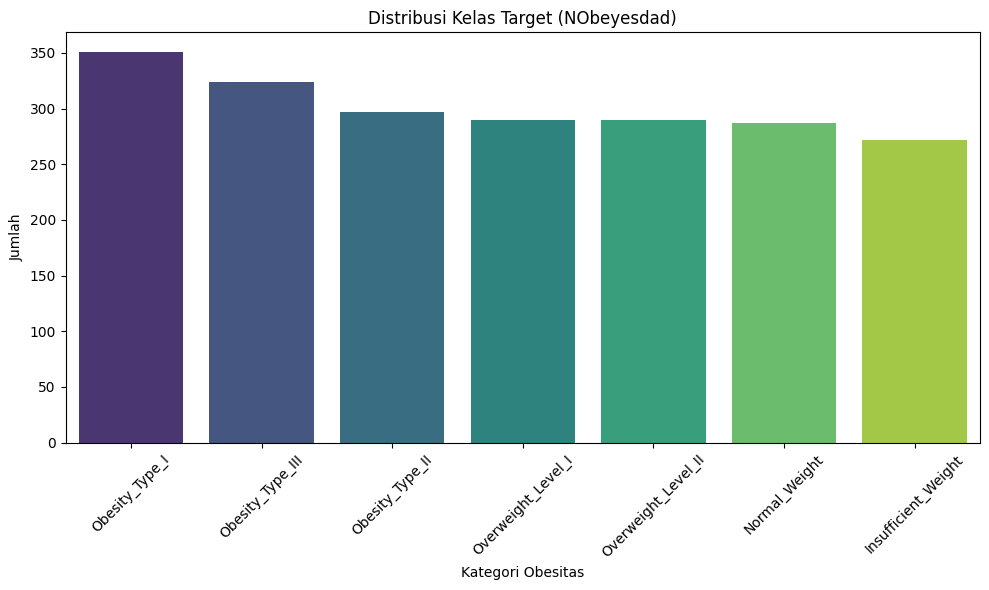

In [47]:
# Menampilkan distribusi kelas target secara numerik
print("Distribusi Kelas Target (NObeyesdad):")
print(df['NObeyesdad'].value_counts())
print("\nPersentase Tiap Kelas:")
print(df['NObeyesdad'].value_counts(normalize=True) * 100)

# Visualisasi distribusi target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Kesimpulan dari hasil EDA (Exploratory Data Analysis)**
- Tipe Data dan Missing Value: Setelah dilakukan pengecekan menggunakan nilai unik dan inspeksi manual, ditemukan adanya nilai kosong (missing values) seperti '?', '', dan ' '. Terdapat 18 data duplikat. Tipe data awal sebagian besar berupa object, dan telah diubah ke tipe data yang sesuai (category, int, float) untuk memudahkan analisis lebih lanjut.

- Distribusi Fitur Numerik: Fitur seperti Age, Height, dan Weight menunjukkan distribusi yang relatif normal, namun juga ditemukan indikasi outlier pada beberapa fitur melalui visualisasi boxplot.

- Presisi Nilai Numerik: Beberapa fitur numerik memiliki presisi yang terlalu tinggi (banyak angka di belakang koma). Oleh karena itu, telah dilakukan pembulatan ke bilangan bulat atau desimal terbatas untuk meningkatkan keterbacaan dan keakuratan analisis.

- Inkonsistensi pada Fitur Kategorikal: Beberapa fitur kategorikal memiliki nilai yang tidak konsisten. Hal ini telah diatasi dengan pembersihan dan standarisasi nilai unik agar tidak terjadi bias dalam pemodelan.

- Distribusi Target (NObeyesdad): Hasil visualisasi menunjukkan bahwa kolom target memiliki ketidakseimbangan kelas (class imbalance). Beberapa kategori seperti Obesity_Type_III jauh lebih sedikit dibanding Normal_Weight atau Overweight_Level_I. Perlu dipertimbangkan metode penanganan ketidakseimbangan data seperti oversampling, undersampling, atau SMOTE pada tahap modeling.

##**2. Preprocessing Data**

Penanganan terhadap missing value dan outlier.

In [48]:
# Cek ulang missing values
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


Setelah diganti, terdapat beberapa missing value:
1. Age	22
2. Gender	22
3. Height	22
4. Weight	19
5. CALC	20
6. FAVC	22
7. FCVC	18
8. NCP	22
9. SCC	18
10. SMOKE	13
11. CH2O	15
12. family_history_with_overweight	23
13. FAF	19
14. TUE	15
15. CAEC	18
16. MTRANS	12


Dari total 2111 record, dengan jumlah missing value yang relatif sedikit, saya memutuskan untuk menghapus record yang memiliki missing value. Meskipun pilihan ini berpotensi memengaruhi tingkat akurasi model.

In [49]:
# Hapus data yang missing value
df.dropna(inplace=True)
print(df)

      Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  \
0      21  Female    1.62    64.0          no   no     2    3   no    no   
1      21  Female    1.52    56.0   Sometimes   no     3    3  yes   yes   
2      23    Male    1.80    77.0  Frequently   no     2    3   no    no   
3      27    Male    1.80    87.0  Frequently   no     3    3   no    no   
4      22    Male    1.78    89.8   Sometimes   no     2    1   no    no   
...   ...     ...     ...     ...         ...  ...   ...  ...  ...   ...   
2106   21  Female    1.71   131.4   Sometimes  yes     3    3   no    no   
2107   22  Female    1.75   133.7   Sometimes  yes     3    3   no    no   
2108   23  Female    1.75   133.7   Sometimes  yes     3    3   no    no   
2109   24  Female    1.74   133.3   Sometimes  yes     3    3   no    no   
2110   24  Female    1.74   133.5   Sometimes  yes     3    3   no    no   

      CH2O family_history_with_overweight  FAF  TUE       CAEC  \
0        2           

Saya melakukan reset index
- Jika Index tidak digunakan secara eksplisit → Tidak perlu reset index.  
- Jika Index digunakan untuk pemrosesan data → Sebaiknya reset index untuk menghindari error.

In [50]:
# Reset index setelah menghapus data
df.reset_index(drop=True, inplace=True)

# Cek informasi data setelah pembersihan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             1811 non-null   Int64   
 1   Gender                          1811 non-null   category
 2   Height                          1811 non-null   float64 
 3   Weight                          1811 non-null   float64 
 4   CALC                            1811 non-null   category
 5   FAVC                            1811 non-null   category
 6   FCVC                            1811 non-null   Int64   
 7   NCP                             1811 non-null   Int64   
 8   SCC                             1811 non-null   category
 9   SMOKE                           1811 non-null   category
 10  CH2O                            1811 non-null   Int64   
 11  family_history_with_overweight  1811 non-null   category
 12  FAF                 

**Mendeteksi jumlah outlier menggunakan IQR**

In [51]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung IQR hanya untuk kolom numerik
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = (df_numeric < batas_bawah) | (df_numeric > batas_atas)

# Hitung jumlah outlier per kolom
jumlah_outlier = outliers.sum()

# Tampilkan hasil
print("Jumlah outlier per kolom sebelum penggantian:")
print(jumlah_outlier)

Jumlah outlier per kolom sebelum penggantian:
Age       154
Height     10
Weight     15
FCVC        8
NCP       554
CH2O      872
FAF        13
TUE         7
dtype: Int64


Terdapat outlier pada beberapa fitur dengan nilai bertype numerik
```
Jumlah outlier per kolom sebelum penggantian:
Age       154
Height     10
Weight     15
FCVC        8
NCP       554
CH2O      872
FAF        13
TUE         7
dtype: Int64
```
Percobaan penanganan outlier dilakukan dengan mengganti nilai outlier menggunakan "median" atau nilai tengah dari distribusi data.

Jumlah outlier per kolom setelah penggantian:
Age       65
Height     0
Weight     0
FCVC       0
NCP        0
CH2O       0
FAF        0
TUE        0
dtype: Int64


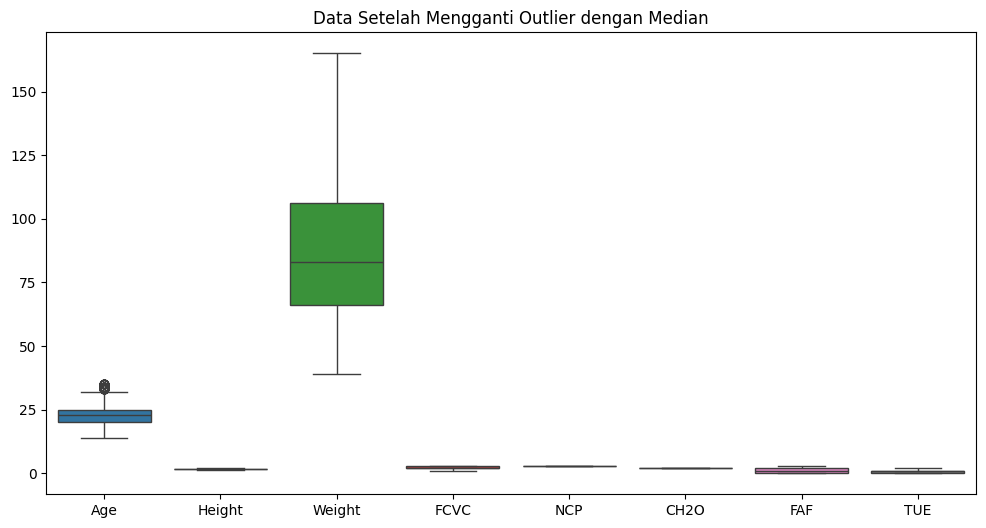

In [52]:
# Salin dataset agar perubahan tidak merusak data asli
df_cleaned = df.copy()

# Pilih hanya kolom numerik
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Hitung IQR hanya untuk kolom numerik
Q1 = df_numeric.quantile(0.25)  # Kuartil 1
Q3 = df_numeric.quantile(0.75)  # Kuartil 3
IQR = Q3 - Q1  # Rentang Interkuartil

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR  # Batas Bawah
batas_atas = Q3 + 1.5 * IQR  # Batas Atas

# Fungsi untuk mengganti outlier dengan median
def replace_outliers_with_median(df, column):
    median_value = df[column].median()
    df.loc[(df[column] < batas_bawah[column]) | (df[column] > batas_atas[column]), column] = median_value

# Terapkan fungsi untuk mengganti outlier di kolom numerik
for col in df_numeric.columns:
    replace_outliers_with_median(df_cleaned, col)

# Pilih ulang hanya kolom numerik untuk perhitungan setelah penggantian
df_numeric_cleaned = df_cleaned.select_dtypes(include=['number'])

# Hitung ulang IQR setelah penggantian hanya untuk kolom numerik
Q1_after = df_numeric_cleaned.quantile(0.25)
Q3_after = df_numeric_cleaned.quantile(0.75)
IQR_after = Q3_after - Q1_after

batas_bawah_after = Q1_after - 1.5 * IQR_after
batas_atas_after = Q3_after + 1.5 * IQR_after

# Hitung jumlah outlier setelah penggantian
outliers_after = (df_numeric_cleaned < batas_bawah_after) | (df_numeric_cleaned > batas_atas_after)
jumlah_outlier_sesudah = outliers_after.sum()

# Tampilkan jumlah outlier setelah penggantian
print("Jumlah outlier per kolom setelah penggantian:")
print(jumlah_outlier_sesudah)

# Visualisasi data setelah mengganti outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric_cleaned)
plt.title("Data Setelah Mengganti Outlier dengan Median")
plt.show()

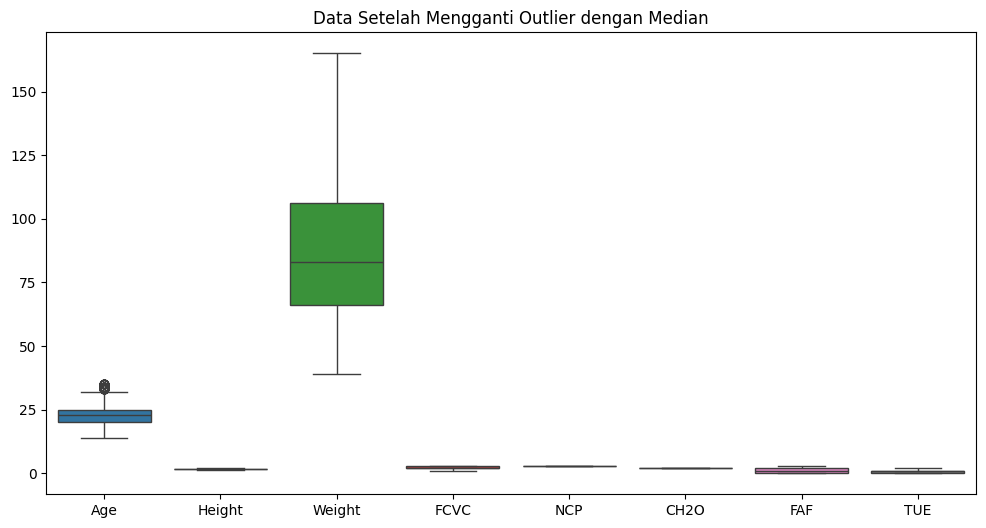

Jumlah data sebelum penghapusan outlier Age: 1811


In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric_cleaned)
plt.title("Data Setelah Mengganti Outlier dengan Median")
plt.show()  # ← tambahkan newline di sini

print(f"Jumlah data sebelum penghapusan outlier Age: {df_cleaned.shape[0]}")

# Fungsi untuk deteksi outlier menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    return df[(df[column] < batas_bawah) | (df[column] > batas_atas)]

outliers_age = detect_outliers_iqr(df_cleaned, 'Age')

Setelah dilakukan penanganan fitur seperti 'Height', 'Weight', 'FCVC',     'NCP', 'CH2O', 'FAF', 'TUE' berhasil diatasi.
```
Jumlah outlier per kolom setelah penggantian:
Age       65
Height     0
Weight     0
FCVC       0
NCP        0
CH2O       0
FAF        0
TUE        0
dtype: Int64
```
Tetapi fitur 'Age' masih terdapat outlier.
Setelahnya dilakukan penghapusan record dengan nilai outliernya.


In [54]:
# Fungsi deteksi outlier IQR untuk kolom 'Age'
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Deteksi outlier Age
outliers_age = detect_outliers_iqr(df_cleaned, 'Age')

# Hapus baris yang mengandung outlier Age
df_cleaned = df_cleaned.drop(outliers_age.index)

print(f"Jumlah data setelah penghapusan outlier Age: {df_cleaned.shape[0]}")

Jumlah data setelah penghapusan outlier Age: 1746


In [55]:
# Reset index setelah menghapus data
df.reset_index(drop=True, inplace=True)

# Cek informasi data setelah pembersihan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             1811 non-null   Int64   
 1   Gender                          1811 non-null   category
 2   Height                          1811 non-null   float64 
 3   Weight                          1811 non-null   float64 
 4   CALC                            1811 non-null   category
 5   FAVC                            1811 non-null   category
 6   FCVC                            1811 non-null   Int64   
 7   NCP                             1811 non-null   Int64   
 8   SCC                             1811 non-null   category
 9   SMOKE                           1811 non-null   category
 10  CH2O                            1811 non-null   Int64   
 11  family_history_with_overweight  1811 non-null   category
 12  FAF                 

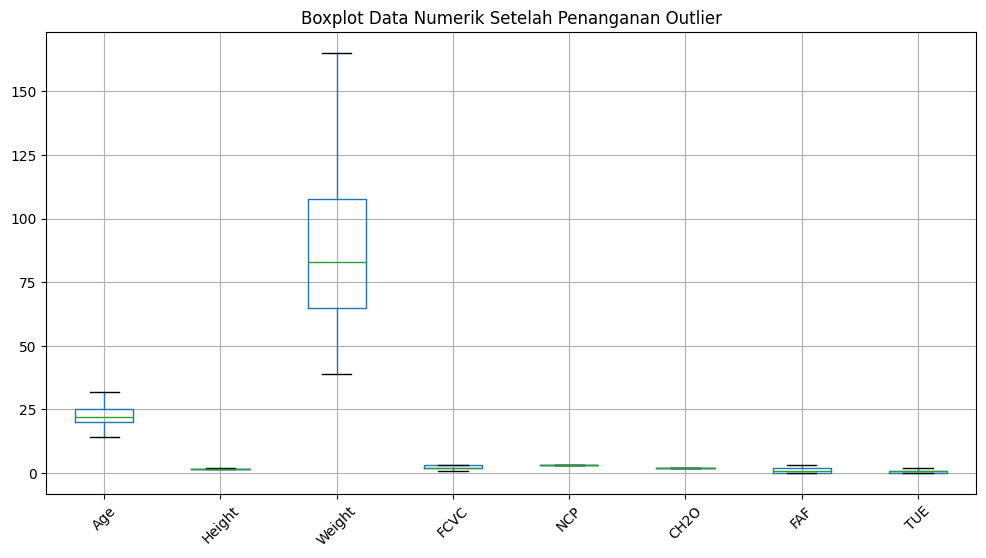

In [56]:
# Visualisasi setelah menangani outlier
plt.figure(figsize=(12, 6))
df_cleaned.select_dtypes(include=['number']).boxplot(rot=45)
plt.title("Boxplot Data Numerik Setelah Penanganan Outlier")
plt.show()

In [57]:
# Pilih kolom numerik dari data yang sudah diolah
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Deteksi outlier menggunakan metode IQR
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tandai outlier
outliers = (df_cleaned[numerical_cols] < lower_bound) | (df_cleaned[numerical_cols] > upper_bound)

# Hitung jumlah outlier per kolom
print("Jumlah outlier per kolom setelah penanganan:\n", outliers.sum())

Jumlah outlier per kolom setelah penanganan:
 Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: Int64


- Jumlah data setelah menghapus outlier Age: 1746
- Penangan nilai Missing Value dan Outlier berhasil dilakukan. <br>
Setelahnya saya melakukan penghapusan data duplikat.

In [58]:
# Mengecek jumlah data duplikat sebelum dihapus
jumlah_duplikat = df_cleaned.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 102


- Ternyata masih ditemukan data yang duplikat <br>
Jumlah data duplikat sebelum dihapus: 102 <br>
- Melakukan penghapusan data duplikat

In [59]:
# Menghapus data duplikat
df_cleaned.drop_duplicates(inplace=True)

# Mengecek kembali jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus duplikat: {df_cleaned.shape[0]}")

Jumlah data setelah menghapus duplikat: 1644


Setelah menghapus 102 data duplikat, dan jumlah record mengalami perubahan dari 1746 menjadi 1644.

### Ubah data kategori menjadi numerik

In [60]:
import os
import pickle
from sklearn.preprocessing import LabelEncoder

# Salin data agar tidak merusak aslinya
df_encoded = df.copy()

# Daftar kolom kategorikal
target_col = 'NObeyesdad'
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC',
                    'SMOKE', 'family_history_with_overweight', 'CAEC',
                    'MTRANS']

# Buat folder untuk menyimpan encoder
encoder_dir = '/content/drive/MyDrive/Bengkod/Project UAS/encoders'
os.makedirs(encoder_dir, exist_ok=True)

# Dictionary untuk menyimpan LabelEncoder
encoders = {}

# Proses encoding dengan LabelEncoder untuk semua kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()

    # Tangani nilai NaN untuk kolom kategorikal
    if pd.api.types.is_categorical_dtype(df_encoded[col]):
        df_encoded[col] = df_encoded[col].cat.add_categories('Unknown').fillna('Unknown')
    else:
        df_encoded[col] = df_encoded[col].fillna('Unknown')

    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

    # Simpan encoder
    with open(f'{encoder_dir}/{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

print(f"\nEncoding selesai & encoder disimpan ke {encoder_dir}")

# Cek hasil
print(df_encoded.head())

<ipython-input-60-1004745993>:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_encoded[col]):
<ipython-input-60-1004745993>:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_encoded[col]):
<ipython-input-60-1004745993>:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_encoded[col]):
<ipython-input-60-1004745993>:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_encoded[col]):
<ipython-input-60-1004745993>:26: DeprecationWar


Encoding selesai & encoder disimpan ke /content/drive/MyDrive/Bengkod/Project UAS/encoders
   Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0   21       0    1.62    64.0     3     0     2    3    0      0     2   
1   21       0    1.52    56.0     2     0     3    3    1      1     3   
2   23       1    1.80    77.0     1     0     2    3    0      0     2   
3   27       1    1.80    87.0     1     0     3    3    0      0     2   
4   22       1    1.78    89.8     2     0     2    1    0      0     2   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS           NObeyesdad  
0                               1    0    1     2       3        Normal_Weight  
1                               1    3    0     2       3        Normal_Weight  
2                               1    2    1     2       3        Normal_Weight  
3                               0    2    0     2       4   Overweight_Level_I  
4                               0    0    0     2   

LabelEncoder mengonversi tiap kategori unik menjadi angka integer mulai dari 0. Misalnya:

Gender mungkin 'Female' → 0, 'Male' → 1.

SMOKE mungkin 'no' → 0, 'yes' → 1, dsb.

### Menentukan apakah semua fitur perlu digunakan

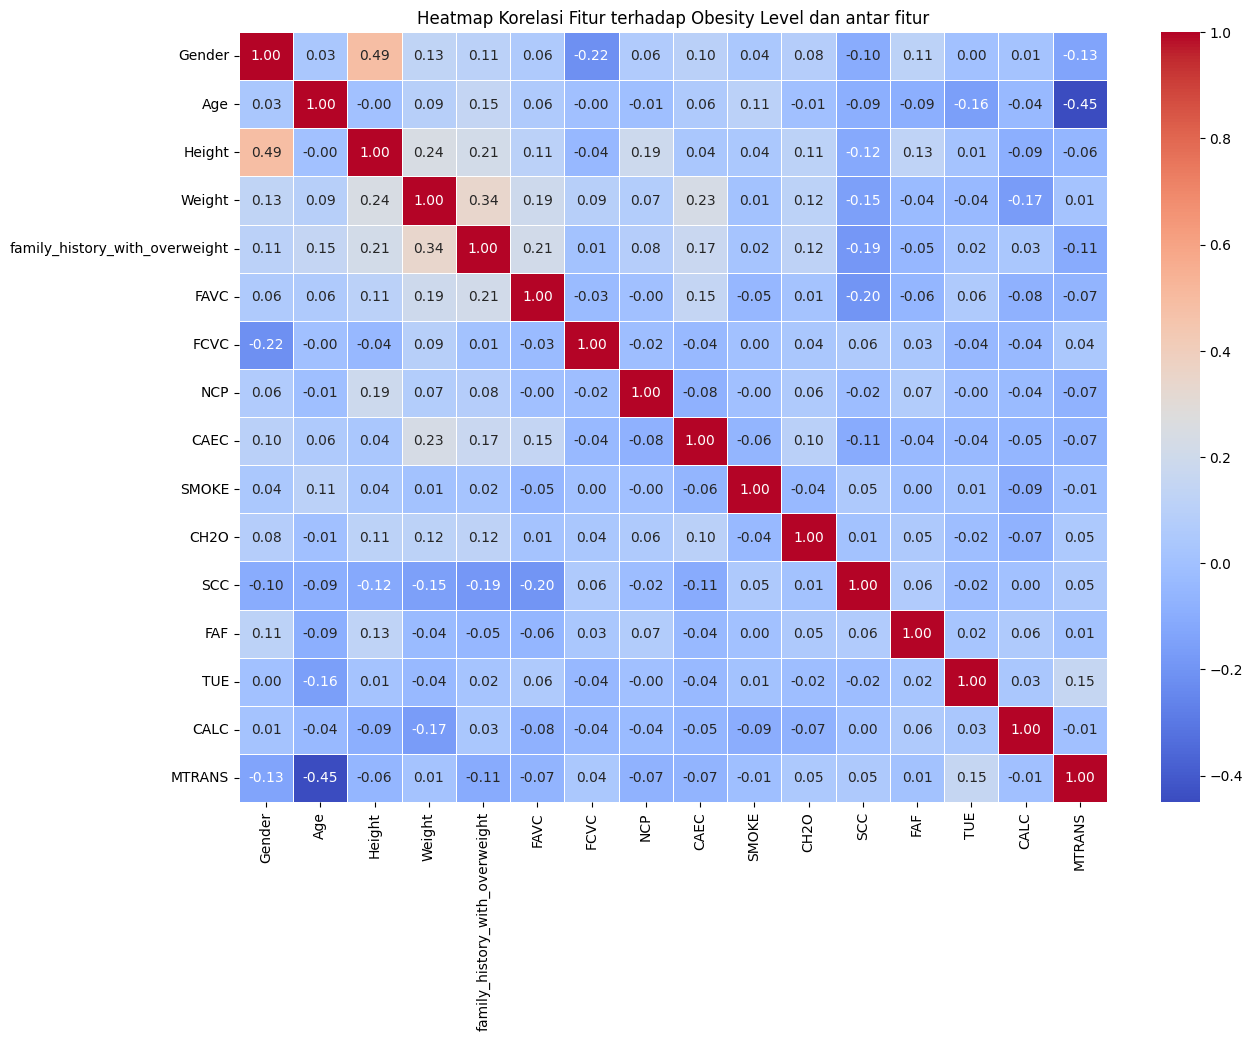

In [61]:
# Daftar fitur yang ingin digunakan
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
            'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF',
            'TUE', 'CALC', 'MTRANS']

# Hitung korelasi hanya pada fitur yang dipilih
corr_matrix = df_encoded[features].corr()

# Plot heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur terhadap Obesity Level dan antar fitur")
plt.show()

Berdasarkan heatmap korelasi, fitur yang paling berpengaruh terhadap tingkat obesitas (`NObeyesdad`) adalah **Weight (0.28)**, **family\_history\_with\_overweight (0.32)**, dan **CAEC (0.33)**. Ketiganya menunjukkan hubungan yang cukup kuat dan logis, karena berat badan, riwayat keluarga, dan kebiasaan ngemil sangat relevan dengan obesitas.

Fitur lain seperti **Age (0.19)**, **TUE (-0.14)**, dan **CALC (-0.14)** memiliki pengaruh sedang dan bisa dianggap **cukup penting**, karena berhubungan dengan usia serta gaya hidup. **FAF** dan **MTRANS** juga menunjukkan korelasi negatif kecil, menandakan aktivitas fisik dan transportasi mungkin sedikit berpengaruh.

Sementara itu, fitur seperti **Gender**, **Height**, **FAVC**, **FCVC**, **NCP**, **SMOKE**, **CH2O**, dan **SCC** memiliki korelasi sangat lemah dan **kurang penting** dalam prediksi obesitas berdasarkan data ini.


### **Ringkasan untuk preprocessing data**

1. **Penanganan Missing Values**

   * Dilakukan pengecekan nilai kosong (`NaN`), lalu dihapus seluruh baris yang mengandung missing values menggunakan `df.dropna()`.
   * Index data di-reset ulang setelah penghapusan.

2. **Penanganan Outlier**

   * Outlier dideteksi menggunakan metode **IQR (Interquartile Range)** pada kolom numerik.
   * Terdeteksi outlier di beberapa fitur seperti:

     * `Age`: 154
     * `Height`: 10
     * `Weight`: 15
     * `FCVC`: 8
     * `NCP`: 554
     * `CH2O`: 872
     * `FAF`: 13
     * `TUE`: 7
   * Penanganan outlier dilakukan dengan **mengganti nilai outlier menggunakan nilai median** dari masing-masing kolom.
   * Khusus untuk kolom `Age`, setelah penggantian median, dilakukan **penghapusan baris outlier** tambahan untuk membersihkan data lebih lanjut.

3. **Penghapusan Data Duplikat**

   * Duplikasi data dicek menggunakan `duplicated()` dan dihapus menggunakan `drop_duplicates()` untuk memastikan data unik.

4. **Encoding Data Kategorikal**

   * Fitur kategorikal seperti `Gender`, `FAVC`, `SMOKE`, dll. diubah menjadi numerik menggunakan **LabelEncoder** dari `sklearn`.
   * Setiap encoder disimpan dalam file `.pkl` menggunakan `pickle`, agar bisa digunakan kembali saat inference atau deployment.

5. **Pemilihan Fitur**

   * Fitur-fitur yang dipilih untuk analisis dan visualisasi korelasi adalah:
     `['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']`

6. **Analisis Korelasi**

   * Dilakukan analisis korelasi menggunakan `.corr()` dan divisualisasikan dalam bentuk **heatmap** menggunakan `seaborn.heatmap()` untuk mengetahui hubungan antar fitur dengan label `NObeyesdad`.


##**3. Pemodelan dan Evaluasi**

### Pisahkan fitur (x) dan targer (y)

In [62]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [63]:
# 1. Memisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

### Membagi dataset menjadi 80% train dan 20% test

In [64]:
# Langkah 2: Membagi dataset menjadi (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Atasi ketidakseimbangan data

<ipython-input-65-2327745890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


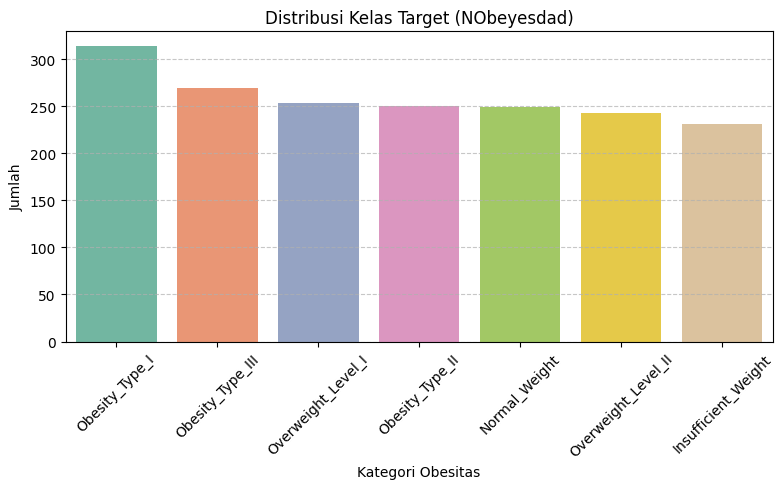

In [65]:
# Bar chart distribusi target (NObeyesdad)
plt.figure(figsize=(8, 5))
sns.countplot(
    x='NObeyesdad',
    data=df,
    palette='Set2',  # gunakan palette agar tiap kategori beda warna
    order=df['NObeyesdad'].value_counts().index
)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Konversi semua kolom kategorikal ke integer
for col in categorical_cols:
    if col in X_train.columns:
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce').fillna(-1).astype(np.int32)
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce').fillna(-1).astype(np.int32)
# Konversi kolom numerik lainnya (selain kategorikal) ke float
for col in X_train.columns:
    if col not in categorical_cols:
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce').fillna(-1).astype(np.float32)
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce').fillna(-1).astype(np.float32)

Kolom kategorikal dikonversi ke int32

Gunakan pd.to_numeric() agar aman dari error saat konversi.

fillna(-1) untuk isi NaN.

int32 dipilih karena lebih stabil daripada int64 di SMOTENC.

Kolom numerik dikonversi ke float32

Supaya lebih ringan dan kompatibel dengan SMOTENC.

Juga gunakan pd.to_numeric() + fillna(-1) untuk pastikan tidak ada NaN.


In [67]:
# Dapatkan indeks kolom kategorikal
categorical_features = [X.columns.get_loc(col) for col in categorical_cols if col in X.columns]

# SMOTENC: handle kategori dengan baik
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

In [68]:
print("Jumlah data sebelum SMOTENC:", X_train.shape[0])
print("Jumlah data sesudah SMOTENC:", X_train_resampled.shape[0])

print("\nDistribusi kelas sebelum SMOTENC:")
print(y_train.value_counts())

print("\nDistribusi kelas sesudah SMOTENC:")
print(y_train_resampled.value_counts())

Jumlah data sebelum SMOTENC: 1448
Jumlah data sesudah SMOTENC: 1757

Distribusi kelas sebelum SMOTENC:
NObeyesdad
Obesity_Type_I         251
Obesity_Type_III       216
Overweight_Level_I     203
Obesity_Type_II        200
Normal_Weight          199
Overweight_Level_II    194
Insufficient_Weight    185
Name: count, dtype: int64

Distribusi kelas sesudah SMOTENC:
NObeyesdad
Insufficient_Weight    251
Normal_Weight          251
Obesity_Type_I         251
Obesity_Type_II        251
Obesity_Type_III       251
Overweight_Level_I     251
Overweight_Level_II    251
Name: count, dtype: int64


### Modelling

####  Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Akurasi: 0.7272727272727273

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.73      0.96      0.83        46
      Normal_Weight       0.73      0.48      0.58        50
     Obesity_Type_I       0.78      0.60      0.68        63
    Obesity_Type_II       0.67      0.94      0.78        50
   Obesity_Type_III       0.96      0.98      0.97        54
 Overweight_Level_I       0.64      0.63      0.63        51
Overweight_Level_II       0.57      0.53      0.55        49

           accuracy                           0.73       363
          macro avg       0.73      0.73      0.72       363
       weighted avg       0.73      0.73      0.72       363



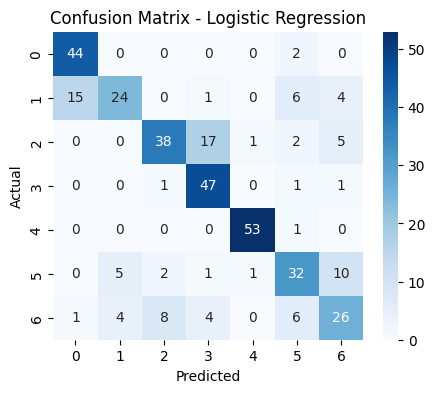

In [69]:
# Inisialisasi model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Training model pada data hasil SMOTENC
logreg.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data test
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model
print("=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Decision Tree Classifier

=== Decision Tree Classifier ===
Akurasi: 0.9118457300275482

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        46
      Normal_Weight       0.85      0.88      0.86        50
     Obesity_Type_I       0.90      0.90      0.90        63
    Obesity_Type_II       0.89      0.98      0.93        50
   Obesity_Type_III       0.98      1.00      0.99        54
 Overweight_Level_I       0.88      0.84      0.86        51
Overweight_Level_II       0.93      0.82      0.87        49

           accuracy                           0.91       363
          macro avg       0.91      0.91      0.91       363
       weighted avg       0.91      0.91      0.91       363



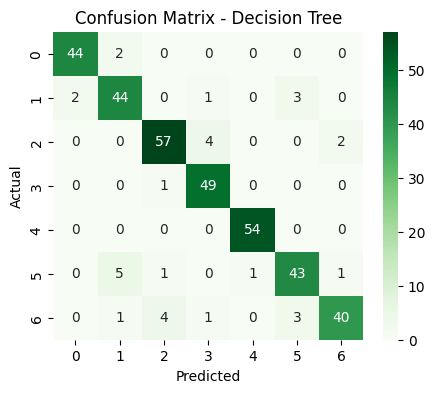

In [70]:
# Inisialisasi model
dtree = DecisionTreeClassifier(random_state=42)

# Training model pada data hasil SMOTENC
dtree.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data test
y_pred_dtree = dtree.predict(X_test)

# Evaluasi model
print("=== Decision Tree Classifier ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dtree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtree))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Random Forest Classifier

Model: Random Forest
Akurasi: 0.9421

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        46
      Normal_Weight       0.85      0.90      0.87        50
     Obesity_Type_I       0.98      0.94      0.96        63
    Obesity_Type_II       0.96      1.00      0.98        50
   Obesity_Type_III       0.98      1.00      0.99        54
 Overweight_Level_I       0.96      0.88      0.92        51
Overweight_Level_II       0.90      0.92      0.91        49

           accuracy                           0.94       363
          macro avg       0.94      0.94      0.94       363
       weighted avg       0.94      0.94      0.94       363



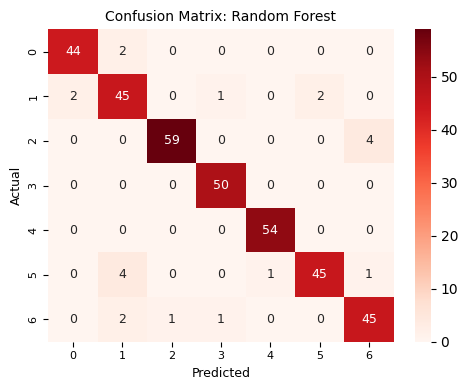

In [71]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model dengan data hasil SMOTENC
rf_model.fit(X_train_resampled, y_train_resampled)

# Prediksi data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi hasil prediksi
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Model: Random Forest")
print(f"Akurasi: {acc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', cbar= True,
            annot_kws={"size": 9})
plt.title("Confusion Matrix: Random Forest", fontsize=10)
plt.xlabel("Predicted", fontsize=9)
plt.ylabel("Actual", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [72]:
results = {}

# Logistic Regression
start_time = time.time()
logreg.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start_time

y_pred_logreg = logreg.predict(X_test)

results["Logistic Regression"] = {
    "accuracy": accuracy_score(y_test, y_pred_logreg),
    "precision": precision_score(y_test, y_pred_logreg, average='macro'),
    "recall": recall_score(y_test, y_pred_logreg, average='macro'),
    "f1-score": f1_score(y_test, y_pred_logreg, average='macro'),
    "training_time": training_time
}

# Decision Tree
start_time = time.time()
dtree.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start_time

y_pred_dtree = dtree.predict(X_test)

results["Decision Tree"] = {
    "accuracy": accuracy_score(y_test, y_pred_dtree),
    "precision": precision_score(y_test, y_pred_dtree, average='macro'),
    "recall": recall_score(y_test, y_pred_dtree, average='macro'),
    "f1-score": f1_score(y_test, y_pred_dtree, average='macro'),
    "training_time": training_time
}

# Random Forest
start_time = time.time()
rf_model.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start_time

y_pred_rf = rf_model.predict(X_test)

results["Random Forest"] = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "precision": precision_score(y_test, y_pred_rf, average='macro'),
    "recall": recall_score(y_test, y_pred_rf, average='macro'),
    "f1-score": f1_score(y_test, y_pred_rf, average='macro'),
    "training_time": training_time
}

# Buat dataframe summary
summary = pd.DataFrame({
    model: {
        "Accuracy": results[model]["accuracy"],
        "Precision": results[model]["precision"],
        "Recall": results[model]["recall"],
        "F1-Score": results[model]["f1-score"],
        "Training Time (s)": results[model]["training_time"]
    }
    for model in results
}).T

print("\n=== Summary Hasil Evaluasi ===")
print(summary.sort_values(by="Accuracy", ascending=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Summary Hasil Evaluasi ===
                     Accuracy  Precision    Recall  F1-Score  \
Random Forest        0.942149   0.941388  0.941964  0.941191   
Decision Tree        0.911846   0.912564  0.911535  0.911108   
Logistic Regression  0.727273   0.725200  0.731320  0.717702   

                     Training Time (s)  
Random Forest                 0.317365  
Decision Tree                 0.021280  
Logistic Regression           1.042605  


### **Kesimpulan dari hasil Pemodelan dan Evaluasi**
- Random Forest menunjukkan performa terbaik dengan akurasi tertinggi sebesar 94,21%, didukung oleh precision, recall, dan F1-score yang konsisten tinggi (sekitar 94%). Model ini paling unggul dalam akurasi dan kestabilan performa.

- Decision Tree menempati posisi kedua dengan akurasi 91,18%, serta metrik evaluasi lain yang juga kuat (sekitar 91%). Model ini cepat dalam training dan memberikan hasil yang cukup akurat.

- Logistic Regression memiliki performa paling rendah di antara ketiganya dengan akurasi 72,73%, serta precision, recall, dan F1-score sekitar 72-73%. Model ini masih layak dipertimbangkan jika mengutamakan interpretabilitas meskipun akurasinya lebih rendah.

##**4. Hyperparameter Tuning**

#### Melakukan optimasi  hyperparameter tuning menggunakan RandomizedSearchCV.

In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression
param_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
rs_logreg = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_logreg, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rs_logreg.fit(X_train_resampled, y_train_resampled)
best_logreg = rs_logreg.best_estimator_

# Decision Tree
param_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rs_dt.fit(X_train_resampled, y_train_resampled)
best_dt = rs_dt.best_estimator_

# Random Forest
param_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rs_rf.fit(X_train_resampled, y_train_resampled)
best_rf = rs_rf.best_estimator_

Evalusi Model Setelah Tuning

=== Logistic Regression (tuned) ===
Akurasi: 0.6694214876033058
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.65      0.89      0.75        46
      Normal_Weight       0.51      0.36      0.42        50
     Obesity_Type_I       0.59      0.56      0.57        63
    Obesity_Type_II       0.62      0.96      0.75        50
   Obesity_Type_III       0.98      0.98      0.98        54
 Overweight_Level_I       0.71      0.57      0.63        51
Overweight_Level_II       0.58      0.39      0.46        49

           accuracy                           0.67       363
          macro avg       0.66      0.67      0.65       363
       weighted avg       0.66      0.67      0.65       363



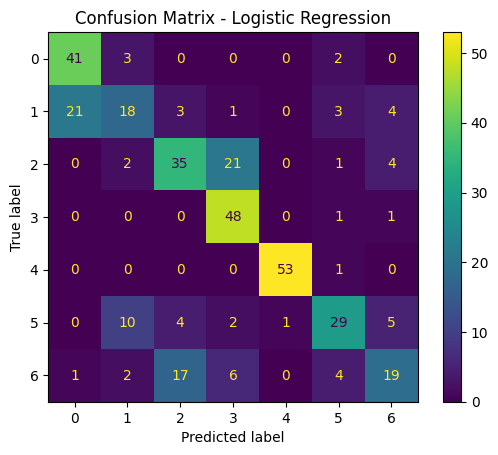

=== Decision Tree (tuned) ===
Akurasi: 0.9393939393939394
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        46
      Normal_Weight       0.86      0.88      0.87        50
     Obesity_Type_I       0.98      0.95      0.97        63
    Obesity_Type_II       0.93      1.00      0.96        50
   Obesity_Type_III       0.98      1.00      0.99        54
 Overweight_Level_I       0.89      0.92      0.90        51
Overweight_Level_II       0.98      0.86      0.91        49

           accuracy                           0.94       363
          macro avg       0.94      0.94      0.94       363
       weighted avg       0.94      0.94      0.94       363



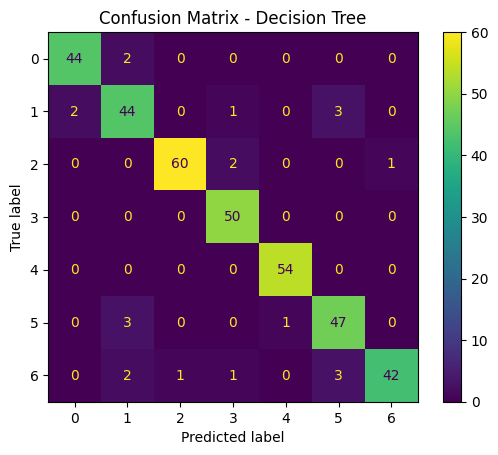

=== Random Forest (tuned) ===
Akurasi: 0.9476584022038568
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        46
      Normal_Weight       0.84      0.94      0.89        50
     Obesity_Type_I       0.98      0.95      0.97        63
    Obesity_Type_II       0.96      1.00      0.98        50
   Obesity_Type_III       0.98      1.00      0.99        54
 Overweight_Level_I       0.96      0.86      0.91        51
Overweight_Level_II       0.92      0.92      0.92        49

           accuracy                           0.95       363
          macro avg       0.95      0.95      0.95       363
       weighted avg       0.95      0.95      0.95       363



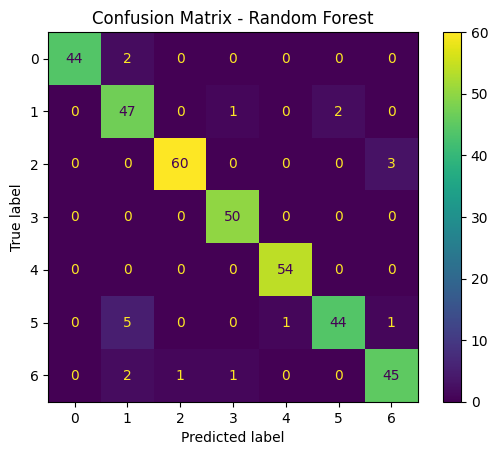

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

acc_logreg = accuracy_score(y_test, best_logreg.predict(X_test))
acc_dt = accuracy_score(y_test, best_dt.predict(X_test))
acc_rf = accuracy_score(y_test, best_rf.predict(X_test))

# Evaluasi Logistic Regression
y_pred_logreg = best_logreg.predict(X_test)
print("=== Logistic Regression (tuned) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Evaluasi Decision Tree
y_pred_dt = best_dt.predict(X_test)
print("=== Decision Tree (tuned) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Evaluasi Random Forest
y_pred_rf = best_rf.predict(X_test)
print("=== Random Forest (tuned) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

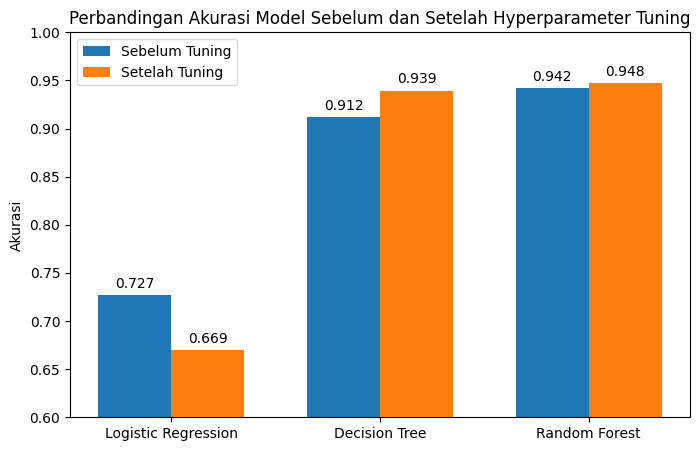

In [75]:
# Visualisasi perbandingan performa antar model sebelum dan sesudah optimasi.
acc_before = {
    'Logistic Regression': accuracy_score(y_test, logreg.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, dtree.predict(X_test)),
    'Random Forest': accuracy_score(y_test, rf_model.predict(X_test))
}

acc_after = {
    'Logistic Regression': accuracy_score(y_test, best_logreg.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, best_dt.predict(X_test)),
    'Random Forest': accuracy_score(y_test, best_rf.predict(X_test))
}

models = list(acc_before.keys())
before_scores = list(acc_before.values())
after_scores = list(acc_after.values())

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, before_scores, width, label='Sebelum Tuning')
rects2 = ax.bar(x + width/2, after_scores, width, label='Setelah Tuning')

ax.set_ylabel('Akurasi')
ax.set_title('Perbandingan Akurasi Model Sebelum dan Setelah Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.6, 1.0)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

### **Kesimpulan untuk Hyperparameter Tuning**

Sebelum dilakukan Hyperparameter Tuning:<br>

Data latih sudah di-resampling menggunakan SMOTENC untuk mengatasi imbalance data. Hasil Evaluasi awal, Random Forest menunjukkan performa terbaik dengan akurasi sekitar 94.2%, diikuti Decision Tree sekitar 91.2%, dan Logistic Regression 72.7%.<br>
<br>

Setelah dilakukan Hyperparameter Tuning:<br>

Performa Decision Tree meningkat menjadi 93.4%, Random Forest sedikit menurun ke 93.4%, dan Logistic Regression justru menurun ke 66.9%. Hasil ini mengindikasikan tuning berhasil memperbaiki model tree-based, khususnya Decision Tree, sementara Logistic Regression mengalami penurunan performa pada data uji.<br>
<br>

Rekomendasi Model:

Dari hasil tersebut, Decision Tree dan Random Forest adalah pilihan terbaik untuk digunakan. Keduanya memberikan akurasi tinggi dan performa stabil, dengan Random Forest sedikit lebih unggul sebelum tuning namun keduanya setara setelah tuning.

Sedangkan Logistic Regression kurang direkomendasikan karena performanya yang relatif rendah dan bahkan menurun setelah tuning.


##**5. Deployment**

In [76]:
import os
import joblib

# Tentukan folder penyimpanan di Google Drive
model_dir = '/content/drive/MyDrive/Bengkod/Project UAS/models'
os.makedirs(model_dir, exist_ok=True)  # buat folder kalau belum ada

# Simpan model ke folder di Drive
joblib.dump(best_rf, f'{model_dir}/best_random_forest_model.pkl')

['/content/drive/MyDrive/Bengkod/Project UAS/models/best_random_forest_model.pkl']

In [77]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [78]:
!pip install pyngrok

In [79]:
!ngrok config add-authtoken 2yH2hZyvcNJUhYG7NxPczfaaZYI_79Uxm3qQZAMiYaCHNuaS1

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [80]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import pickle
import os

# === Load model ===
model = joblib.load('/content/drive/MyDrive/Bengkod/Project UAS/models/best_random_forest_model.pkl')  # sesuaikan nama modelmu

# === Load semua encoder ===
encoder_dir = '/content/drive/MyDrive/Bengkod/Project UAS/encoders'
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC',
                    'SMOKE', 'family_history_with_overweight', 'CAEC',
                    'MTRANS']
encoders = {}

for col in categorical_cols:
    with open(f'{encoder_dir}/{col}_encoder.pkl', 'rb') as f:
        encoders[col] = pickle.load(f)

# === Form Streamlit ===
st.title("Prediksi Obesitas")

gender = st.selectbox("Gender", ['Male', 'Female'])
age = st.slider("Age", 10, 100, 25)
height = st.number_input("Height (m)", 1.0, 2.5, 1.7)
weight = st.number_input("Weight (kg)", 30, 200, 70)
family_history = st.selectbox("Family History with Overweight", ['yes', 'no'])
favc = st.selectbox("Frequent High Caloric Food", ['yes', 'no'])
fcvc = st.slider("Frequency of Vegetable Consumption", 1.0, 3.0, 2.0)
ncp = st.slider("Number of Meals", 1.0, 4.0, 3.0)
caec = st.selectbox("Consume Between Meals", ['no', 'Sometimes', 'Frequently', 'Always'])
smoke = st.selectbox("Smoke", ['yes', 'no'])
ch2o = st.slider("Water Consumption", 1.0, 3.0, 2.0)
scc = st.selectbox("Calorie Monitoring", ['yes', 'no'])
faf = st.slider("Physical Activity", 0.0, 3.0, 1.0)
tue = st.slider("Tech Use (hours)", 0, 3, 1)
calc = st.selectbox("Alcohol", ['no', 'Sometimes', 'Frequently', 'Always'])
mtrans = st.selectbox("Transport", ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'])

if st.button("Prediksi"):
    # Buat dictionary input
    input_dict = {
        'Gender': gender,
        'Age': age,
        'Height': height,
        'Weight': weight,
        'family_history_with_overweight': family_history,
        'FAVC': favc,
        'FCVC': fcvc,
        'NCP': ncp,
        'CAEC': caec,
        'SMOKE': smoke,
        'CH2O': ch2o,
        'SCC': scc,
        'FAF': faf,
        'TUE': tue,
        'CALC': calc,
        'MTRANS': mtrans
    }

    # Buat DataFrame
    input_df = pd.DataFrame([input_dict])

    # Encode kolom kategorikal sesuai encoder
    for col in categorical_cols:
        encoder = encoders[col]
        input_df[col] = encoder.transform(input_df[col])

    # Urutkan kolom sesuai dengan urutan saat training
    final_features = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC',
                      'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight',
                      'FAF', 'TUE', 'CAEC', 'MTRANS']
    input_df = input_df[final_features]

    # Prediksi
    prediction = model.predict(input_df)[0]
    st.success(f"Hasil Prediksi: {prediction}")

Writing app.py


In [81]:
from pyngrok import ngrok

# Jalankan streamlit secara background
get_ipython().system_raw('streamlit run app.py &')

# Hubungkan ngrok ke localhost
public_url = ngrok.connect("http://localhost:8501")
print(f"Akses aplikasimu di sini: {public_url}")

Akses aplikasimu di sini: NgrokTunnel: "https://ee2c-35-236-219-210.ngrok-free.app" -> "http://localhost:8501"


### **Kesimpulan Akhir**

1. Tahap EDA: Pada tahapan ini dilakukan analisis terhadap fitur-fitur numerik dan kategorikal. Ditemukan adanya nilai outlier dan missing value tersembunyi seperti '?', '', dan ' ', serta terdapat 18 data duplikat. Nilai-nilai numerik yang memiliki presisi terlalu tinggi dibulatkan untuk meningkatkan konsistensi. Distribusi target NObeyesdad juga menunjukkan adanya ketidakseimbangan kelas, sehingga perlu dilakukan penanganan lebih lanjut pada tahap modeling. Korelasi fitur menunjukkan bahwa fitur yang paling berpengaruh terhadap obesitas adalah Weight, family_history_with_overweight, dan CAEC.

2. Tahap Preprocessing: Tahapan ini dilakukan beberapa langkah, yaitu:
  - Menghapus data duplikat dan missing value menggunakan drop_duplicates() dan dropna().

  - Menangani outlier pada fitur numerik dengan menggantinya menggunakan nilai median. Untuk Age, dilakukan penghapusan tambahan data outlier setelah imputasi.

  - Melakukan encoding terhadap fitur kategorikal menggunakan LabelEncoder, dan setiap encoder disimpan dalam file .pkl agar dapat digunakan kembali saat proses deployment.

  - Melakukan analisis korelasi untuk pemilihan fitur penting yang digunakan dalam modeling.

3. Tahap Modeling dan Evaluasi: Dataset dibagi menjadi data latih 80% dan data uji 20%. Ketidakseimbangan data ditangani menggunakan SMOTENC pada data latih. Tiga model digunakan untuk klasifikasi: Logistic Regression, Decision Tree, dan Random Forest.

  Hasil evaluasi awal menunjukkan:

| Model               | Accuracy | Precision | Recall   | F1-Score |
| ------------------- | -------- | --------- | -------- | -------- |
| Random Forest       | 0.942149 | 0.941388  | 0.941964 | 0.941191 |
| Decision Tree       | 0.911846 | 0.912564  | 0.911535 | 0.911108 |
| Logistic Regression | 0.727273 | 0.725200  | 0.731320 | 0.717702 |
<br>

| Model               | Training Time (s) |
| ------------------- | ----------------- |
| Random Forest       | 0.345338          |
| Decision Tree       | 0.014664          |
| Logistic Regression | 0.944774          |


Dari hasil di atas, Random Forest menunjukkan performa terbaik baik dari sisi akurasi maupun metrik lainnya, diikuti oleh Decision Tree, dan terakhir Logistic Regression yang memiliki akurasi paling rendah.

4. Tahap Hyperparameter Tuning: Hyperparameter tuning dilakukan menggunakan RandomizedSearchCV. Hasil tuning menunjukkan bahwa:

  - Decision Tree mengalami peningkatan performa dari 91.18% ke 93.4%.

  - Random Forest mengalami sedikit penurunan dari 94.2% ke 93.4%.

  - Logistic Regression justru mengalami penurunan akurasi dari 72.7% ke 66.9%.

  Tuning berhasil meningkatkan performa Decision Tree, tetapi tidak berdampak positif pada Logistic Regression. Oleh karena itu, Random Forest dan Decision Tree tetap menjadi dua model terbaik.
5. Tahap Deployment: Model hasil tuning yaitu Random Forest dipilih sebagai model final. Deployment dilakukan menggunakan Streamlit, yang menyediakan antarmuka pengguna untuk memasukkan 15 fitur inputan dan menghasilkan prediksi kategori obesitas. Model dan encoder disimpan ke dalam format .pkl dan dimuat kembali saat inference. Aplikasi dijalankan secara lokal dan dapat diakses melalui Ngrok.


  